<a href="https://colab.research.google.com/github/Blasco0616/MATH14/blob/main/2MMRW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving Cwwurrent Filtered Data.csv to Cwwurrent Filtered Data.csv


In [ ]:
import pandas as pd

# Use the correct file name after uploading
uploaded_file_name = 'Cwwurrent Filtered Data.csv'

# Read the CSV file
col_name = ['CPE Year and Section', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']
dataset = pd.read_csv(uploaded_file_name, names= col_name)


In [ ]:
dataset.head(80)

,CPE Year and Section,Q1,Q2,Q3,Q4,Q5
0,1_2,1,5,2,1,3
1,2_1,1,4,3,4,4
2,1_1,1,3,2,1,4
3,1_2,1,4,2,2,4
4,1_1,1,5,2,2,3
...,...,...,...,...,...,...
75,2_1,1,1,5,2,4
76,2_1,1,1,1,2,1
77,3_1,2,2,2,5,2
78,2_2,1,2,2,4,3


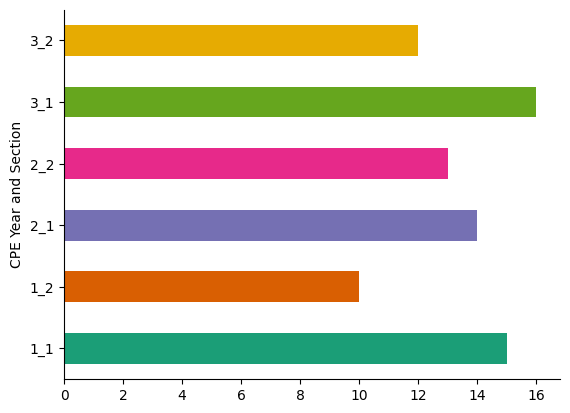

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_45.groupby('CPE Year and Section').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-20-529a930930d9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=dataset, ax=axes[i], palette='Dark2')
<ipython-input-20-529a930930d9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=dataset, ax=axes[i], palette='Dark2')
<ipython-input-20-529a930930d9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=dataset, ax=axes[i], palette='Dark2')
<ipython-input-20-529a930930d9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0.

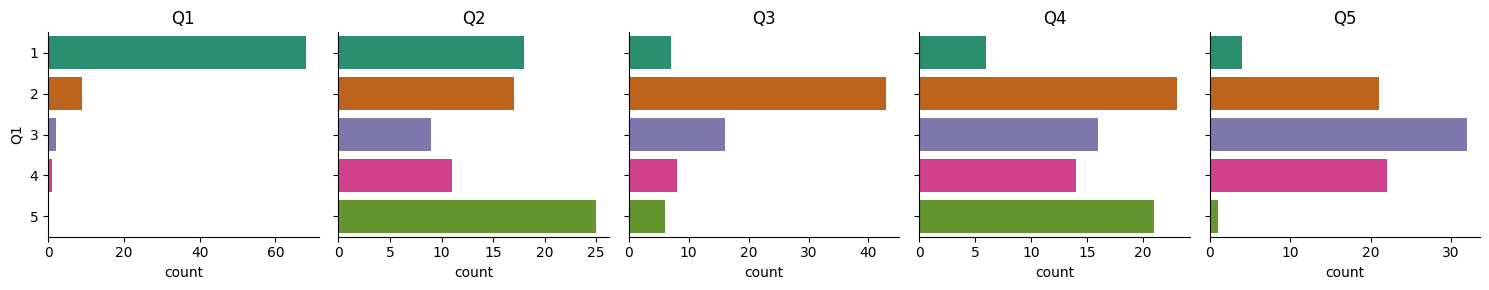

In [ ]:
columns_to_plot = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']

# Create subplots
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(15, 3), sharey=True)

# Plot each bar graph
for i, column in enumerate(columns_to_plot):
    sns.countplot(y=column, data=dataset, ax=axes[i], palette='Dark2')
    axes[i].set_title(column)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CPE Year and Section  80 non-null     object
 1   Q1                    80 non-null     int64 
 2   Q2                    80 non-null     int64 
 3   Q3                    80 non-null     int64 
 4   Q4                    80 non-null     int64 
 5   Q5                    80 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 3.9+ KB


In [ ]:
dataset.describe()

,Q1,Q2,Q3,Q4,Q5
count,80.000000,80.000000,80.000000,80.000000,80.000000
mean,1.200000,3.100000,2.537500,3.262500,2.937500
std,0.537222,1.587929,1.042681,1.328783,0.890793
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,2.000000,2.000000
50%,1.000000,3.000000,2.000000,3.000000,3.000000
75%,1.000000,5.000000,3.000000,5.000000,4.000000
max,4.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
dataset['Q1'].value_counts()

1    68
2     9
3     2
4     1
Name: Q1, dtype: int64

In [ ]:
dataset['Q2'].value_counts()

5    25
1    18
2    17
4    11
3     9
Name: Q2, dtype: int64

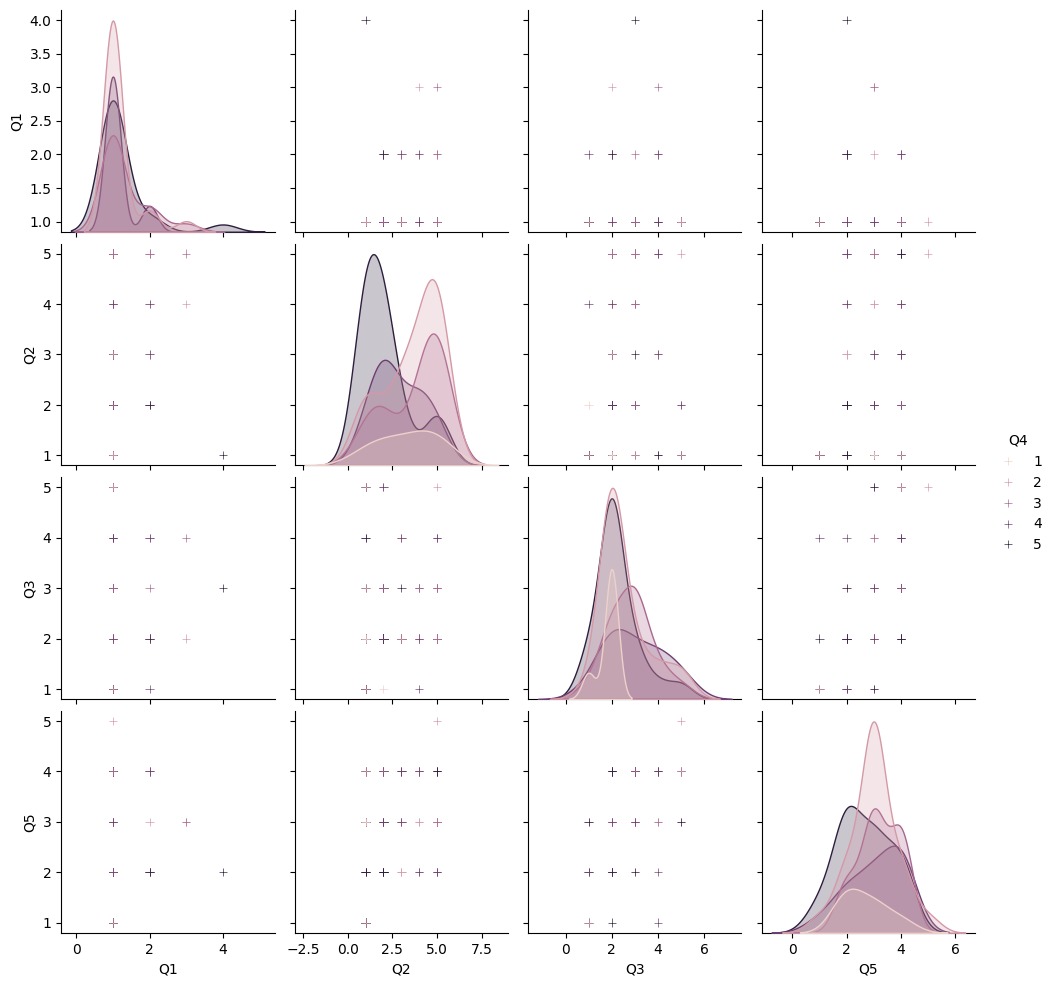

In [ ]:
sns.pairplot(dataset, hue='Q4', markers='+')
plt.show()

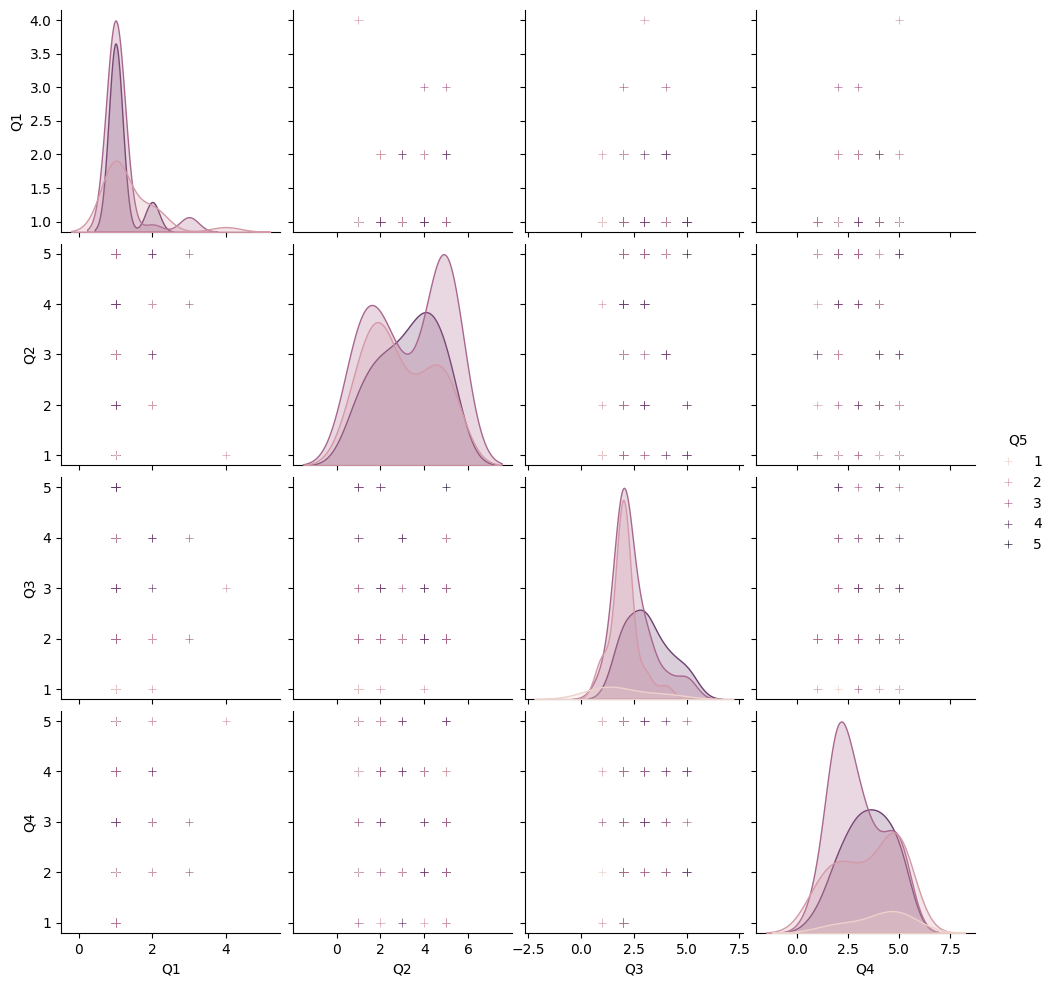

In [ ]:
sns.pairplot(dataset, hue='Q5', markers='+')
plt.show()

In [ ]:
X = dataset.drop(['Q2'], axis=1)
y = dataset['Q2']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (80, 5) | y shape: (80,) 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
# evaluate each model in turn
results = []
model_names = []

cv_results = cross_val_score(model, X_train.applymap(handle_value_error), y_train, cv=kfold, scoring='accuracy', error_score='raise')

results.append(cv_results)
model_names.append(name)
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

SVC: 0.339286 (0.092788)


In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
# evaluate each model in turn
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', error_score='raise')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.357143 (0.071429)
LDA: 0.339286 (0.059225)
KNN: 0.267857 (0.127526)
CART: 0.214286 (0.087482)
NB: 0.160714 (0.030929)
SVC: 0.339286 (0.092788)


In [ ]:
X_train = X_train.applymap(handle_value_error)
model = SVC(gamma='auto')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [ ]:
print(f'Test Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 0.375
Classification Report: 
               precision    recall  f1-score   support

           1       0.29      0.33      0.31         6
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2
           5       0.45      0.62      0.53         8

    accuracy                           0.38        24
   macro avg       0.21      0.33      0.26        24
weighted avg       0.26      0.38      0.31        24



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
